In [1]:
import json
import pandas as pd
today = "_debug/2019-06-23"
today = "2019-06-26/"

In [2]:
import json
def read_json(filename):
    with open(filename, "r") as f:
        return json.load(f)

- [x] time vs best score for 4 different algs
- [x] predictions for `random_state=0`
- [.] (have data) cluster activity for `random_state=0`

In [3]:
# list of arrays for each model.
# DIR = "./"
DIR = f"./out/{today}/"
DIR = f"{today}/out/"
DIR = "./"
# DIR = f"{today}"

# list of arrays with each score/time/etc. Each model entered more than once.

# ordered by adaptive-ness
ALGS = [
#     "passive",
#     "patience",
#     "hyperband-w-patience",
    "hyperband",
]
RAND_STATES = range(152, 152 + 1)

cv_results = {
    alg: [read_json(DIR + f"{today}-{alg}-{random_state}-cv_results.json")
    for random_state in RAND_STATES]
    for alg in ALGS
}
histories = {
    alg: [read_json(DIR + f"{today}-{alg}-{random_state}-history.json")
    for random_state in RAND_STATES]
    for alg in ALGS
}

params = {
    alg: [read_json(DIR + f"{today}-{alg}-{random_state}-params.json")
    for random_state in RAND_STATES]
    for alg in ALGS
}

best = {
    alg: [
        read_json(DIR + f"{today}-{alg}-{random_state}-best-params-and-score.json")
        for random_state in RAND_STATES
    ]
    for alg in ALGS
}

In [4]:
history = histories["hyperband"][0]

In [5]:
_ = [h.pop("params", None) for h in history]

In [6]:
import pandas as pd
df = pd.DataFrame(history)
df.sort_values(by="elapsed_wall_time", inplace=True)

In [7]:
bracket_finish_times = df.groupby("bracket")[["elapsed_wall_time", "score"]].max()
bracket_finish_times

,elapsed_wall_time,score
bracket,,
0,8157.508279,-0.063001
1,7446.536980,-0.070016
2,3100.098492,-0.065083
3,3714.481119,-0.063918
4,3479.386357,-0.063362


In [8]:
max_times = df.groupby("model_id")["elapsed_wall_time"].max()
idx = max_times > 60 * 60  # minutes
max_times[idx]

model_id
bracket=0-0    8157.508273
bracket=0-1    8157.508276
bracket=0-2    8157.508277
bracket=0-3    8157.508278
bracket=0-4    8157.508279
bracket=1-0    6656.486020
bracket=1-1    6656.486024
bracket=1-2    6656.486027
bracket=1-3    7446.536977
bracket=1-4    7446.536980
bracket=1-5    6656.486027
bracket=1-6    6656.486023
bracket=1-7    6656.486028
bracket=3-1    3714.481119
Name: elapsed_wall_time, dtype: float64

bracket=0-0 -0.111 [0.22239137 0.03140243 0.01323576]
bracket=0-1 -0.063 [0.05404713 0.00036617 0.00020456]
bracket=0-2 -7.344 [-5.39594075 -1.32984447 -0.4739871 ]
bracket=0-3 -0.0901 [ 5.11781617e+00  3.92518938e-03 -2.27944553e-03]
bracket=0-4 -0.1651 [ 3.41991782e-02 -6.17206097e-05 -5.27977943e-04]


(-0.2, -0.05)

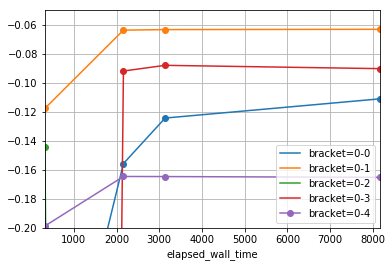

In [16]:
idx = df.bracket.isin([0])
show = df[idx]

import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for model_id in show.model_id.unique():
    show2 = show[show.model_id == model_id]

    show2.plot(x="elapsed_wall_time", y="score",
               ax=ax, style="o-", label=model_id)
#     show2.plot(x="partial_fit_calls", y="score", ax=ax, style="o-")
    diff = np.diff(show2.score)
    if len(diff) > 1:
        print(model_id, np.round(show2.score.iloc[-1], 4), np.diff(show2.score), )

ax.grid()
ax.set_ylim(-0.2, -0.05)

In [35]:
import numpy as np
np.diff([1, 2, 3])

array([1, 1])